# fig3d compare 10X

In [2]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import os
import sys
import glob
from anndata import AnnData
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib as mpl
import matplotlib.pyplot as plt
# import omicverse as ov
# ov.ov_plot_set()
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

2024-09-23 15:42:11.699436: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.5.3 scikit-learn==0.23.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [3]:
os.chdir("./")

# plot

In [4]:
adata=sc.read_h5ad("./data/fig3d_fib_plot.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 13004 × 13675
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'type', 'ZsGreen1_type', 'timepoint', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters', 'celltype2', 'platform', 'timepoint_2', 'batch', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'celltype_ref_GSE155513', 'celltype_ref_GSE131776', 'celltype_level1', 'celltype_level2', 'celltype_platform', 'nCount_integrated', 'nFeature_integrated', 'merged_celltype_level2'
    obsm: 'pca', 'umap'
    layers: 'rna_counts', 'rna_data', 'rna_scale_data'

In [7]:
# plot
adata=adata[adata.obs['merged_celltype_level2'] !='others']
adata.obs["merged_celltype_level2"].value_counts()

Fibroblast1               9457
Fibroblast2               2521
SMC_derived_fibroblast    1026
Name: merged_celltype_level2, dtype: int64

In [8]:
color_dist={
"C4_BGI":'#CB4335',
"GSE155513_10X":'#884EA0'}

color_fib={
    "Fibroblast1" :"#9D8300",
       "Fibroblast2":"#6BBAA3",
       "SMC_derived_fibroblast":"#FF0E83"
}

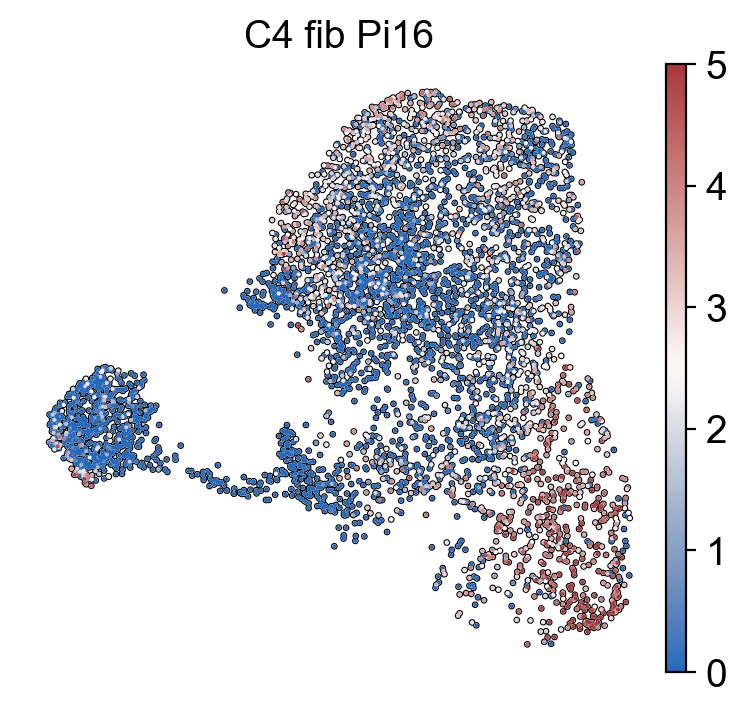

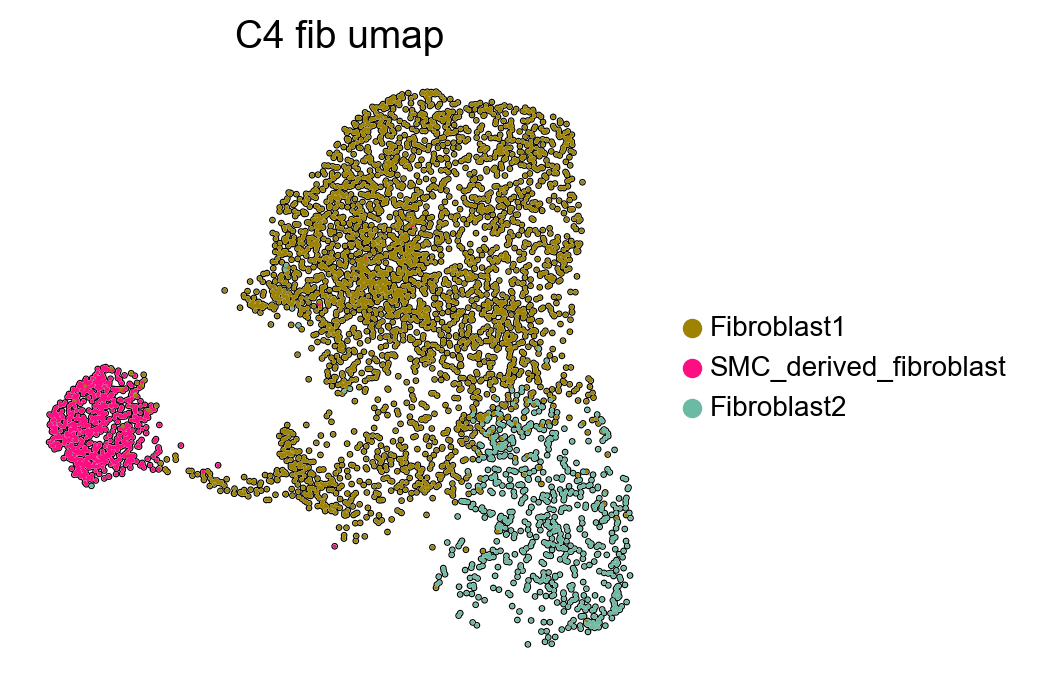

CELL51_N2_1       C4_BGI
CELL734_N1_1      C4_BGI
CELL194_N2_1      C4_BGI
CELL107_N3_1      C4_BGI
CELL952_N1_1      C4_BGI
                   ...  
CELL2005_N1_33    C4_BGI
CELL2181_N1_10    C4_BGI
CELL1903_N1_10    C4_BGI
CELL2928_N1_13    C4_BGI
CELL694_N1_16     C4_BGI
Name: platform, Length: 4999, dtype: category
Categories (1, object): ['C4_BGI']

In [15]:
# genes=["C4_BGI","GSE155513_10X"]
# for j in genes:
fig, ax = plt.subplots(figsize=(4.5, 4))
adata_split=adata[adata.obs['platform'] =='C4_BGI']
sc.pl.umap(adata_split, color="Pi16", 
           size=8,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
           # add_outline=True,
               layer="rna_scale_data",
               vmax=5,vmin=0,
               ax=ax,
                legend_loc='upper right', 
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title="C4 fib Pi16",
              show=True,save="Pi16_fig3d_C4.svg")
fig, ax = plt.subplots(figsize=(4.1, 4))
sc.pl.umap(adata_split, color=['merged_celltype_level2'],
           size=8,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
           # add_outline=True,
               layer="rna_scale_data",
               vmax=2,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title="C4 fib umap",
              show=True,save="celltype_fig3d_C4.svg")
adata_split.obs["platform"]

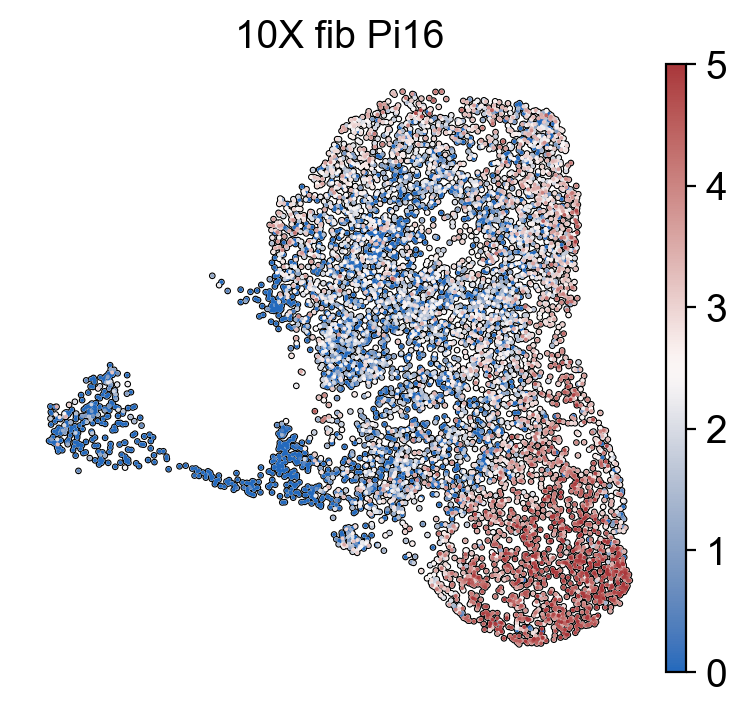

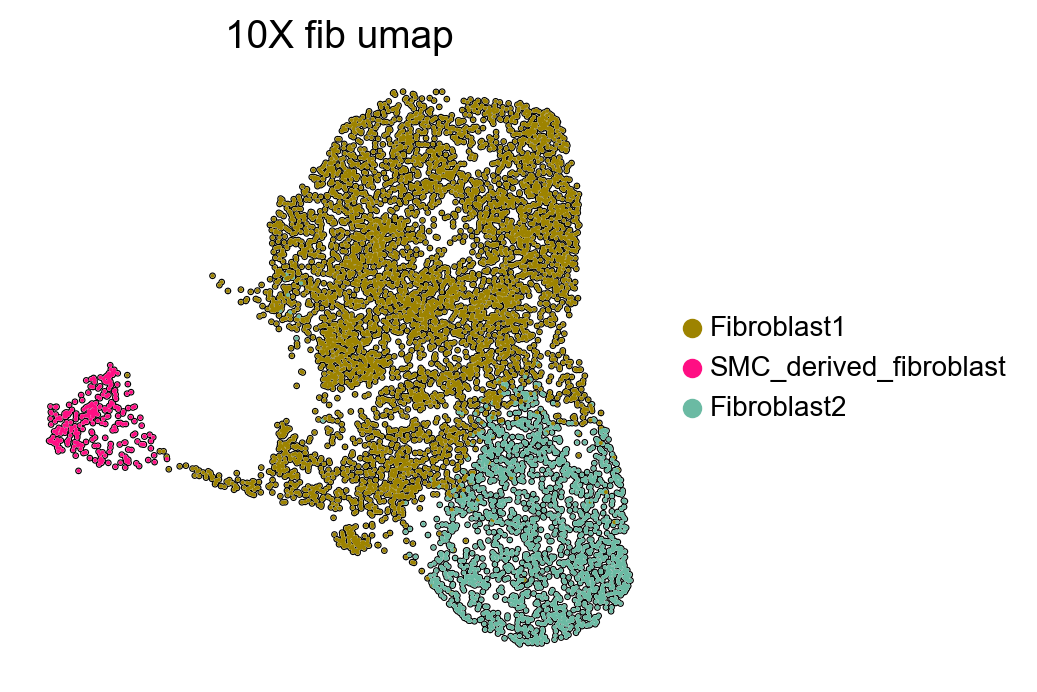

GSM4705592_RPS003_AAACCTGTCTCTGCTG    GSE155513_10X
GSM4705592_RPS003_AAATGCCGTCCAAGTT    GSE155513_10X
GSM4705592_RPS003_AACACGTTCGGCTTGG    GSE155513_10X
GSM4705592_RPS003_AACTCTTGTTATTCTC    GSE155513_10X
GSM4705592_RPS003_AACTTTCTCACCTCGT    GSE155513_10X
                                          ...      
GSM4705605_RPS016_CTGCCTACATAAAGGT    GSE155513_10X
GSM4705605_RPS016_TCATTACGTTTAGGAA    GSE155513_10X
GSM4705605_RPS016_GTAACGTAGAACTGTA    GSE155513_10X
GSM4705605_RPS016_GATGAGGGTAGGAGTC    GSE155513_10X
GSM4705605_RPS016_GCGCGATAGTTAGCGG    GSE155513_10X
Name: platform, Length: 8005, dtype: category
Categories (1, object): ['GSE155513_10X']

In [16]:
# genes=["C4_BGI","GSE155513_10X"]
# for j in genes:
fig, ax = plt.subplots(figsize=(4.5, 4))
adata_split2=adata[adata.obs['platform'] =='GSE155513_10X']
sc.pl.umap(adata_split2, color="Pi16", 
           size=8,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
           # add_outline=True,
               layer="rna_scale_data",
               vmax=5,vmin=0,
               ax=ax,
                legend_loc='upper right', 
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title="10X fib Pi16",
              show=True,save="Pi16_fig3d_10X.svg")
fig, ax = plt.subplots(figsize=(4.1, 4))
sc.pl.umap(adata_split2, color=['merged_celltype_level2'],
           size=8,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
           # add_outline=True,
               layer="rna_scale_data",
               vmax=2,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title="10X fib umap",
              show=True,save="celltype_fig3d_10X.svg")
adata_split2.obs["platform"]

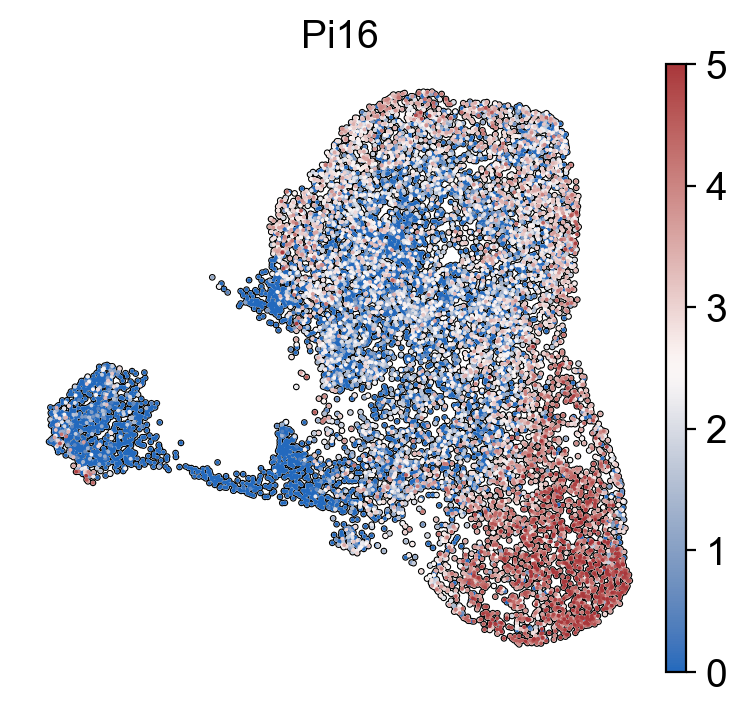

In [19]:
genes=["Pi16"]
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, 
               size=8,
                     alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
               # add_outline=True,
                   layer="rna_scale_data",
                   vmax=5,vmin=0,
                   ax=ax,
                    legend_loc='upper right', 
                   color_map= sns.color_palette("vlag", as_cmap=True),
                   frameon=False,title=j,
                  show=True,save=j+"fig3d.svg")